In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()


# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
ms=Base.classes.measurement
st=Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
sel=[ms.station,st.name,st.latitude,st.longitude,ms.date,ms.prcp,ms.tobs]
lastdate=session.query(ms.date).order_by(ms.date.desc()).first()[0]
lastdate

'2017-08-23'

In [10]:
#putting into datetime format just in case
splitted=lastdate.split('-')
lastdate_dt=dt.date(int(splitted[0]),int(splitted[1]),int(splitted[2]))
lastdate_dt

datetime.date(2017, 8, 23)

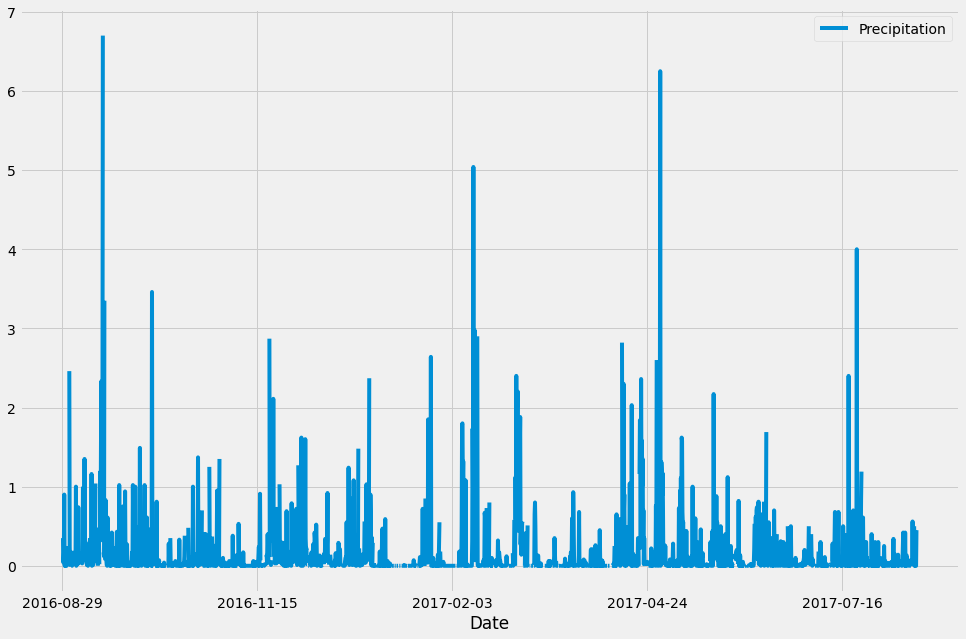

In [48]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

#startdate=startdate.strftime("%Y-%m-%d")


# Calculate the date one year from the last date in data set.
startdate=lastdate_dt+dt.timedelta(days=-30*12)

# Perform a query to retrieve the data and precipitation scores
sel=[ms.date,st.name,ms.prcp]
sel2=[st.station,st.name]
months12=session.query(*sel).join(st,ms.station==st.station).where(ms.date>startdate).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df=pd.DataFrame(months12,columns=["Date","Station","Precipitation"])

# Sort the dataframe by date
prcp_df=prcp_df.sort_values("Date",ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(x="Date",y="Precipitation",kind="line",figsize=(15,10))



In [49]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,1985.000000
mean,0.172383
std,0.453252
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [51]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(st.station)).all()

[(9,)]

In [59]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
sel=[st.station,func.count(ms.station)]
session.query(*sel).join(ms,ms.station==st.station).group_by(st.station).order_by(sel[1]).all()

[('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00511918', 1979),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00519523', 2669),
 ('USC00513117', 2709),
 ('USC00519397', 2724),
 ('USC00519281', 2772)]

In [65]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station='USC00519281'
sel=[ms.station,func.max(ms.tobs),func.min(ms.tobs),func.avg(ms.tobs)]
session.query(*sel).where(ms.station==station).all()

[('USC00519281', 85.0, 54.0, 71.66378066378067)]

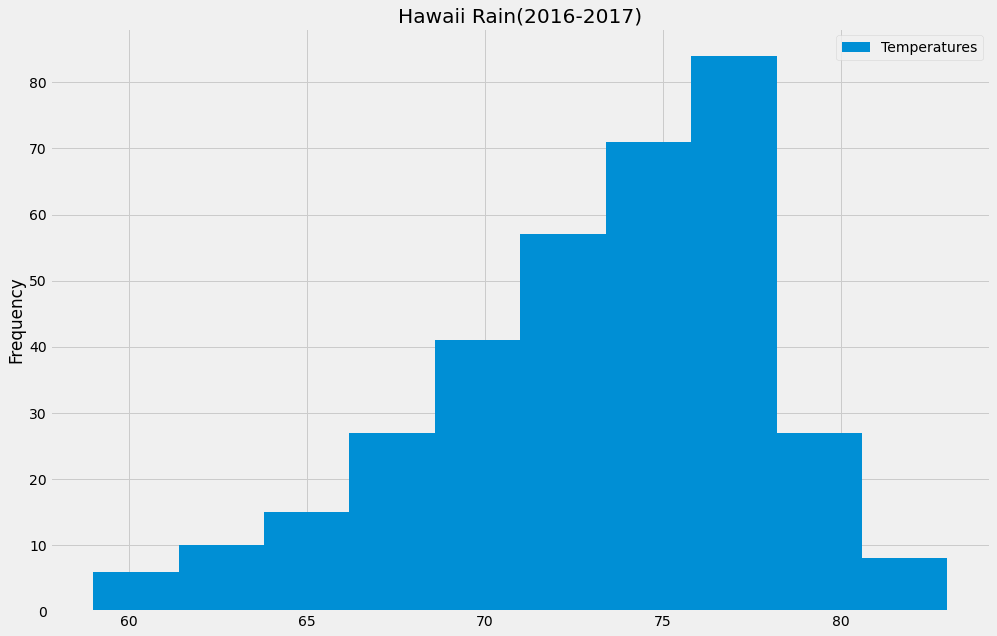

In [74]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel=[ms.tobs]
temps=session.query(*sel).where(ms.station==station).where(ms.date>startdate).all()
temp_df=pd.DataFrame(temps,columns=["Temperatures"])
temp_df.plot(kind='hist',figsize=(15,10),title="Hawaii Rain(2016-2017)")

# Close session

In [ ]:
# Close Session
session.close()